In [1]:
!pip install --quiet vit-keras

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from vit_keras import vit

In [3]:
batch_size = 32  # The default batch size of keras.
num_classes = 100  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169001437/169001437 [==============================] - 12s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# vit_base_16 Model

In [5]:
vit_base_16 = vit.vit_b16(
        image_size = (32,32),
        activation = 'softmax',
        pretrained = None,
        include_top = False,
        pretrained_top = False,
        classes = 100)

vit_base_16_model = tf.keras.Sequential([
        vit_base_16,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, 'softmax')
    ])

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

vit_base_16_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history1 = vit_base_16_model.fit(x_train, y_train, epochs=50, batch_size=64, 
                                  validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 114s 86ms/step - loss: 4.3345 - accuracy: 0.0479 - val_loss: 3.8069 - val_accuracy: 0.1151
Epoch 2/50
782/782 [==============================] - 63s 80ms/step - loss: 3.6462 - accuracy: 0.1384 - val_loss: 3.5169 - val_accuracy: 0.1681
Epoch 3/50
782/782 [==============================] - 63s 80ms/step - loss: 3.3782 - accuracy: 0.1863 - val_loss: 3.3350 - val_accuracy: 0.1997
Epoch 4/50
782/782 [==============================] - 63s 81ms/step - loss: 3.1943 - accuracy: 0.2189 - val_loss: 3.2637 - val_accuracy: 0.2102
Epoch 5/50
782/782 [==============================] - 63s 81ms/step - loss: 3.0593 - accuracy: 0.2431 - val_loss: 3.1173 - val_accuracy: 0.2415
Epoch 6/50
782/782 [==============================] - 63s 80ms/step - loss: 2.9313 - accuracy: 0.2679 - val_loss: 3.0687 - val_accuracy: 0.2545
Epoch 7/50
782/782 [==============================] - 63s 80ms/step - loss: 2.7974 - accuracy: 0.2935 - val_loss: 3.0713 - val_accuracy

In [8]:
vit_base_16_model.save("vit_base_16_model.h5")

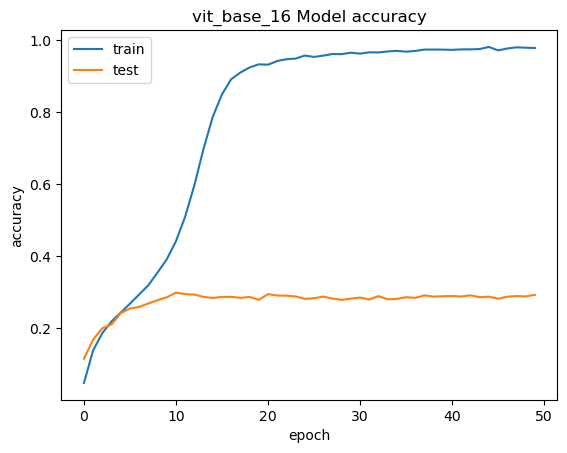

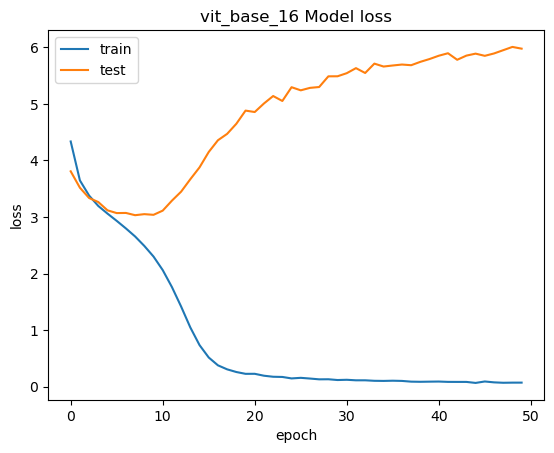

In [9]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('vit_base_16 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('vit_base_16 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# vit_b32 Model

In [10]:
vit_base_32 = vit.vit_b32(
        image_size = (32,32),
        activation = 'softmax',
        pretrained = None,
        include_top = False,
        pretrained_top = False,
        classes = 100)

vit_base_32_model = tf.keras.Sequential([
        vit_base_32,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, 'softmax')
    ])

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

vit_base_32_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
history2 = vit_base_32_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 95s 69ms/step - loss: 4.3512 - accuracy: 0.0435 - val_loss: 3.9801 - val_accuracy: 0.0825
Epoch 2/50
782/782 [==============================] - 49s 63ms/step - loss: 3.8209 - accuracy: 0.1074 - val_loss: 3.6692 - val_accuracy: 0.1357
Epoch 3/50
782/782 [==============================] - 51s 66ms/step - loss: 3.5966 - accuracy: 0.1440 - val_loss: 3.5995 - val_accuracy: 0.1567
Epoch 4/50
782/782 [==============================] - 50s 64ms/step - loss: 3.4519 - accuracy: 0.1698 - val_loss: 3.4361 - val_accuracy: 0.1750
Epoch 5/50
782/782 [==============================] - 52s 66ms/step - loss: 3.3534 - accuracy: 0.1908 - val_loss: 3.4181 - val_accuracy: 0.1864
Epoch 6/50
782/782 [==============================] - 50s 64ms/step - loss: 3.2672 - accuracy: 0.2028 - val_loss: 3.3187 - val_accuracy: 0.2025
Epoch 7/50
782/782 [==============================] - 52s 67ms/step - loss: 3.1925 - accuracy: 0.2159 - val_loss: 3.2446 - val_accuracy:

In [13]:
vit_base_32_model.save("vit_base_32_model.h5")

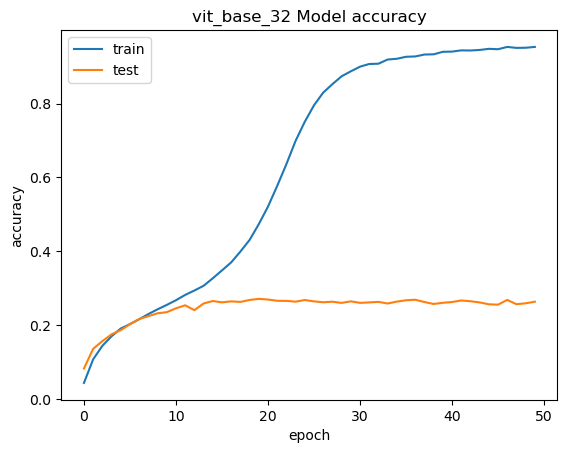

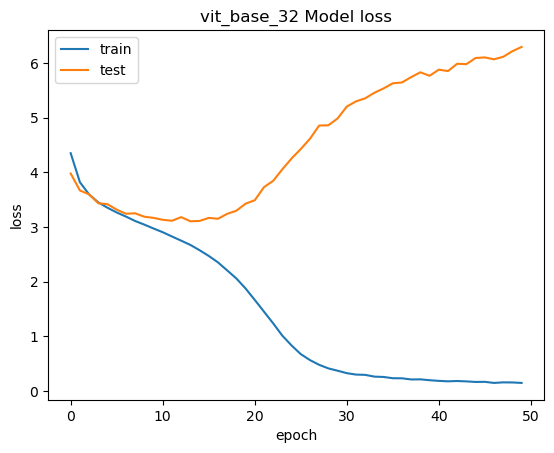

In [14]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('vit_base_32 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('vit_base_32 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# vit_b32 Model

In [15]:
vit_large_16 = vit.vit_l16(
        image_size = (32,32),
        activation = 'softmax',
        pretrained = None,
        include_top = False,
        pretrained_top = False,
        classes = 100)

vit_large_16_model = tf.keras.Sequential([
        vit_large_16,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, 'softmax')
    ])

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

vit_large_16_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [17]:
history3 = vit_large_16_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 259s 222ms/step - loss: 4.7188 - accuracy: 0.0124 - val_loss: 4.5374 - val_accuracy: 0.0137
Epoch 2/50
782/782 [==============================] - 174s 223ms/step - loss: 4.4150 - accuracy: 0.0252 - val_loss: 4.3476 - val_accuracy: 0.0308
Epoch 3/50
782/782 [==============================] - 176s 225ms/step - loss: 4.1770 - accuracy: 0.0497 - val_loss: 4.0037 - val_accuracy: 0.0684
Epoch 4/50
782/782 [==============================] - 167s 213ms/step - loss: 3.9048 - accuracy: 0.0857 - val_loss: 3.7800 - val_accuracy: 0.1046
Epoch 5/50
782/782 [==============================] - 167s 214ms/step - loss: 3.6863 - accuracy: 0.1252 - val_loss: 3.5724 - val_accuracy: 0.1482
Epoch 6/50
782/782 [==============================] - 174s 223ms/step - loss: 3.5058 - accuracy: 0.1609 - val_loss: 3.5242 - val_accuracy: 0.1652
Epoch 7/50
782/782 [==============================] - 175s 224ms/step - loss: 3.3638 - accuracy: 0.1853 - val_loss: 3.3477 -

In [18]:
vit_large_16_model.save("vit_large_16_model.h5")

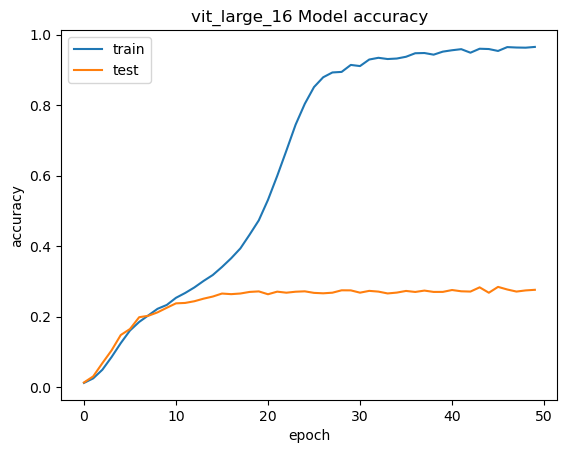

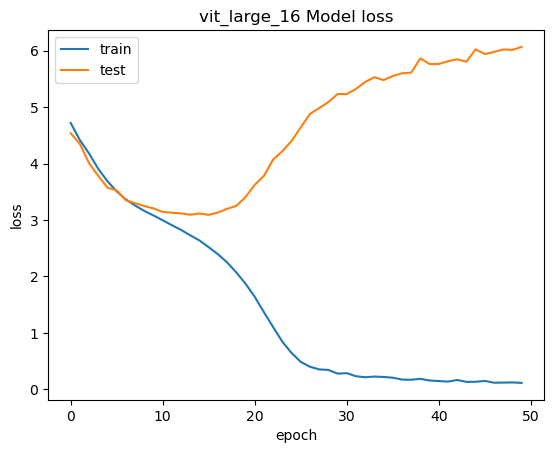

In [19]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('vit_large_16 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('vit_large_16 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()